In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-transaction-fraud-detection/Bank_Transaction_Fraud_Detection.csv


In [2]:
df=pd.read_csv('/kaggle/input/bank-transaction-fraud-detection/Bank_Transaction_Fraud_Detection.csv')
df

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,b8bdae19-296f-48b7-9104-e055d33a09ac,Vedhika Magar,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,8d856bc7-4666-4509-a067-48d67500694a,08-01-2025,...,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,INR,+9192629XXXXXX,ATM withdrawal,vedhikaXXXXX@XXXXXXX.com
199996,635bc099-8a93-48ee-829a-bf2283fe8fda,Aashi Pai,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,f2890dbd-4e01-445d-97f5-ac56886e9037,01-01-2025,...,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,INR,+9198116XXXXXX,Subscription box,aashiXXX@XXXXXX.com
199997,c1b31cc2-0905-47e8-8cc5-6461d1f3ba33,Dayita Shan,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,f714b758-7539-474d-b676-5fa7e2480141,28-01-2025,...,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,INR,+9192601XXXXXX,Charity donation,dayitaXXXX@XXXXXXX.com
199998,32bb8e66-f3fa-43bf-8242-dab9a6116310,Unnati Vyas,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,f6903b6a-b582-47ea-95d5-aff16bdec950,08-01-2025,...,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,INR,+9197537XXXXXX,Tourist attraction payment,unnatiXXX@XXXXX.com


In [3]:
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [4]:
df['State'].unique()

array(['Kerala', 'Maharashtra', 'Bihar', 'Tamil Nadu', 'Punjab',
       'Gujarat', 'Delhi', 'Andaman and Nicobar Islands',
       'Madhya Pradesh', 'Chhattisgarh', 'Mizoram', 'West Bengal',
       'Sikkim', 'Dadra and Nagar Haveli and Daman and Diu',
       'Uttar Pradesh', 'Odisha', 'Tripura', 'Assam', 'Manipur',
       'Karnataka', 'Andhra Pradesh', 'Goa', 'Haryana', 'Lakshadweep',
       'Jharkhand', 'Meghalaya', 'Chandigarh', 'Arunachal Pradesh',
       'Nagaland', 'Telangana', 'Rajasthan', 'Himachal Pradesh',
       'Puducherry', 'Uttarakhand'], dtype=object)

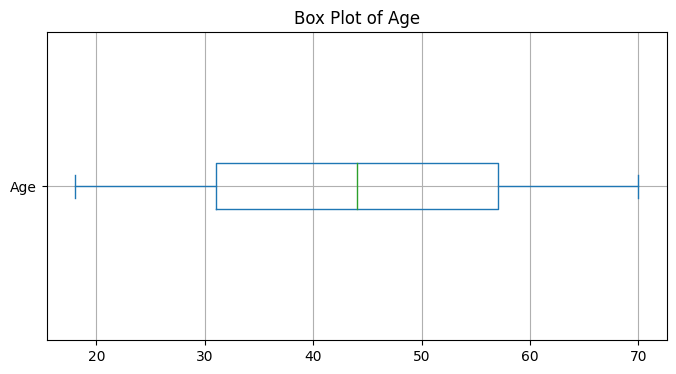

In [5]:
df['Age'].plot(kind='box', vert=False, grid=True, figsize=(8,4))
plt.title("Box Plot of Age")
plt.show()


In [6]:
df['Gender'].value_counts()

Gender
Male      100452
Female     99548
Name: count, dtype: int64

In [7]:
df['Account_Type'].value_counts()

Account_Type
Checking    66924
Savings     66593
Business    66483
Name: count, dtype: int64

In [8]:
df['Merchant_Category'].unique()

array(['Restaurant', 'Groceries', 'Entertainment', 'Health', 'Clothing',
       'Electronics'], dtype=object)

In [9]:
df['Transaction_Device'].unique()

array(['Voice Assistant', 'POS Mobile Device', 'ATM', 'POS Mobile App',
       'Virtual Card', 'Mobile Device', 'Payment Gateway Device',
       'Debit/Credit Card', 'Bank Branch', 'Desktop/Laptop',
       'Self-service Banking Machine', 'ATM Booth Kiosk',
       'Biometric Scanner', 'Web Browser', 'Tablet', 'Wearable Device',
       'QR Code Scanner', 'Smart Card', 'POS Terminal', 'Banking Chatbot'],
      dtype=object)

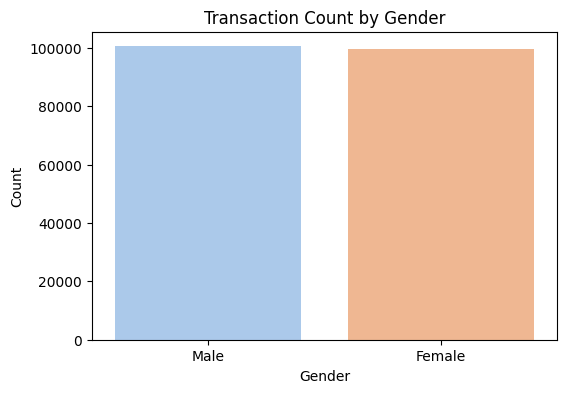

In [10]:
# Transaction count by gender
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'], palette='pastel')
plt.title("Transaction Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

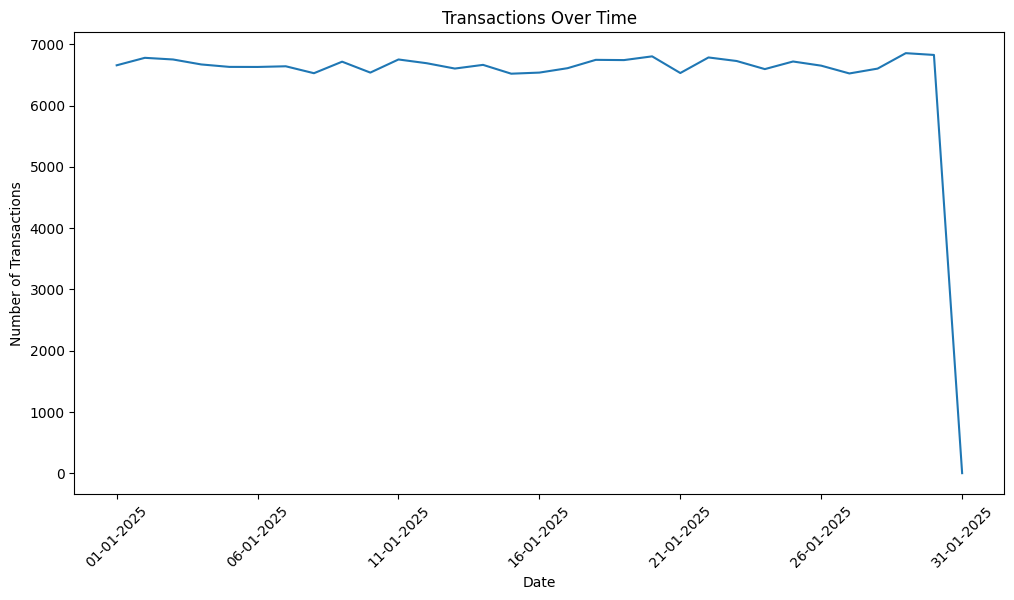

In [11]:
# --- Transaction Analysis ---
# Transactions over time
plt.figure(figsize=(12, 6))
df['Transaction_Date'].value_counts().sort_index().plot()
plt.title("Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

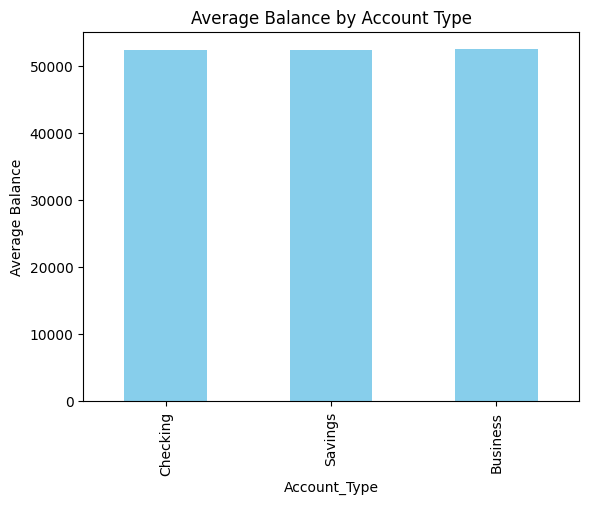

In [12]:
# Average account balance per account type
avg_balance = df.groupby("Account_Type")["Account_Balance"].mean().sort_values()
avg_balance.plot(kind='bar', title='Average Balance by Account Type', color='skyblue')
plt.ylabel("Average Balance")
plt.show()

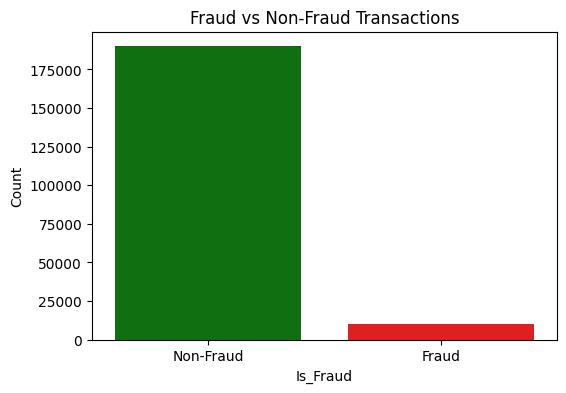

In [13]:
fraud_count = df['Is_Fraud'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_count.index, y=fraud_count.values, palette=['green', 'red'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.ylabel("Count")
plt.show()

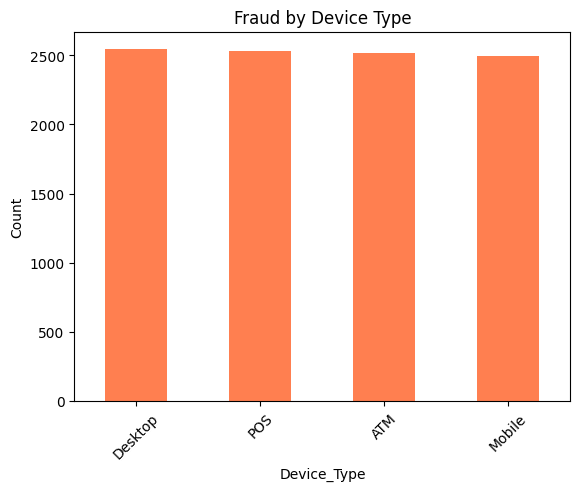

In [14]:
# Fraud by transaction device
device_fraud = df[df['Is_Fraud'] == 1]['Device_Type'].value_counts()
device_fraud.plot(kind='bar', title='Fraud by Device Type', color='coral')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


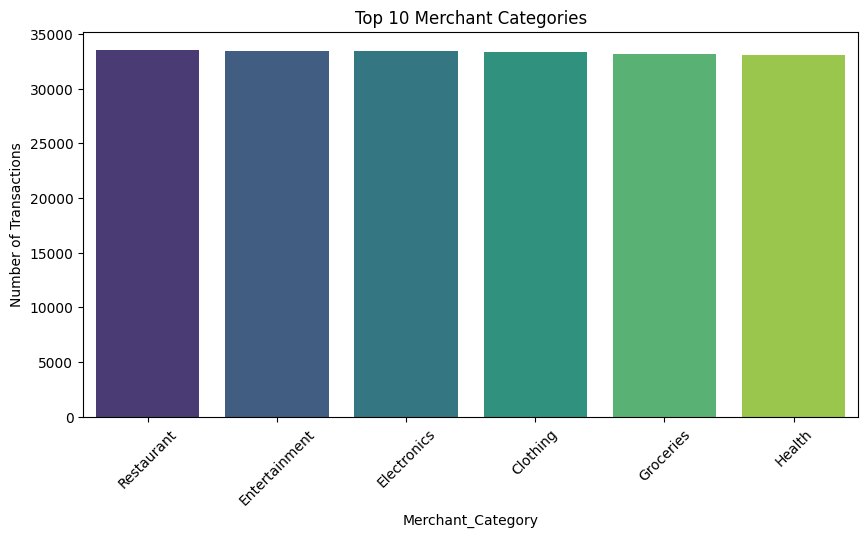

In [15]:
# --- Customer Behavior Analysis ---
# Top merchant categories
top_merchants = df['Merchant_Category'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_merchants.index, y=top_merchants.values, palette='viridis')
plt.title("Top 10 Merchant Categories")
plt.xticks(rotation=45)
plt.ylabel("Number of Transactions")
plt.show()

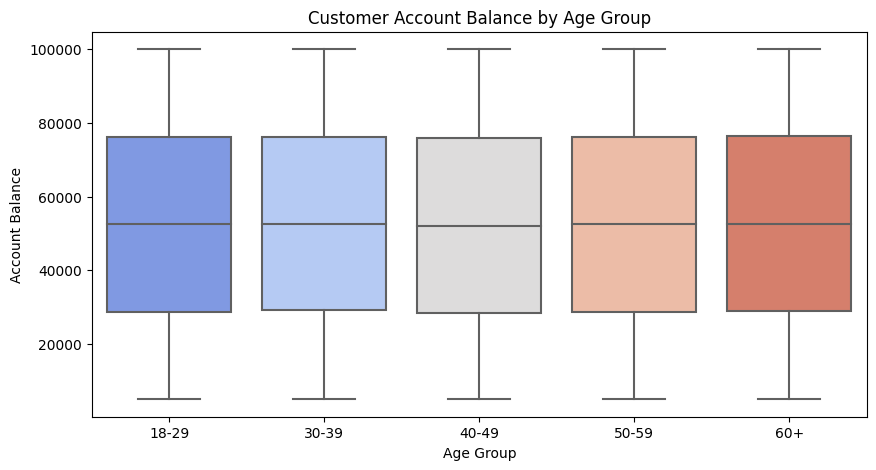

In [16]:
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age_Group', y='Account_Balance', data=df, palette='coolwarm')
plt.title("Customer Account Balance by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Account Balance")
plt.show()

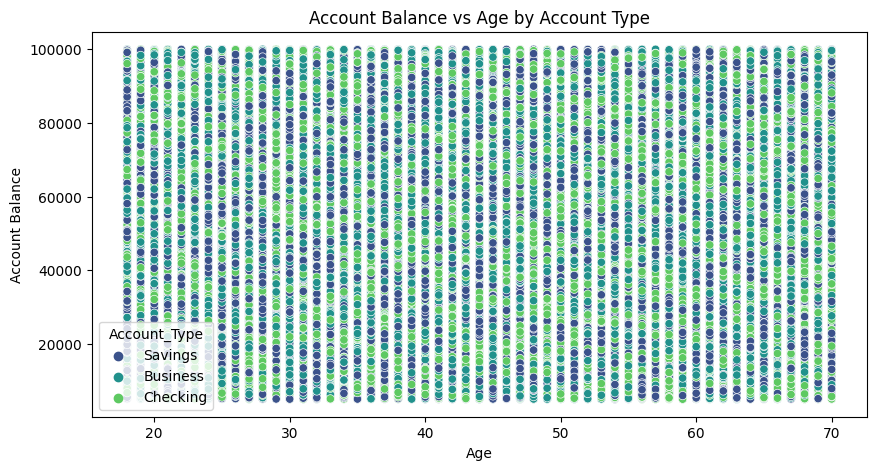

In [17]:
# Account balance vs Age
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Age'], y=df['Account_Balance'], hue=df['Account_Type'], palette='viridis')
plt.title("Account Balance vs Age by Account Type")
plt.xlabel("Age")
plt.ylabel("Account Balance")
plt.show()

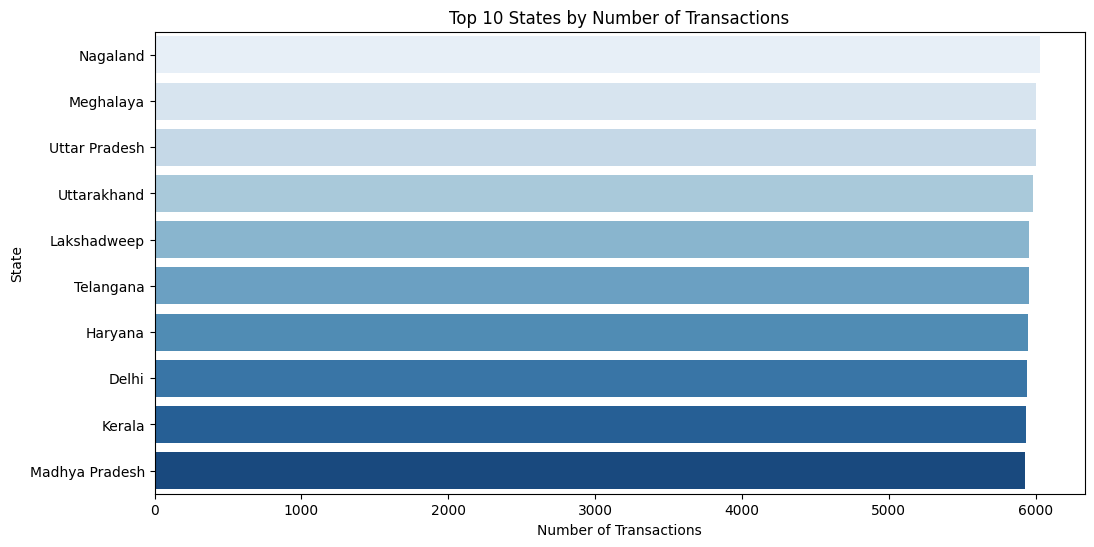

In [18]:
# Transactions by State
plt.figure(figsize=(12, 6))
sns.countplot(y=df['State'], order=df['State'].value_counts().index[:10], palette='Blues')
plt.title("Top 10 States by Number of Transactions")
plt.ylabel("State")
plt.xlabel("Number of Transactions")
plt.show()

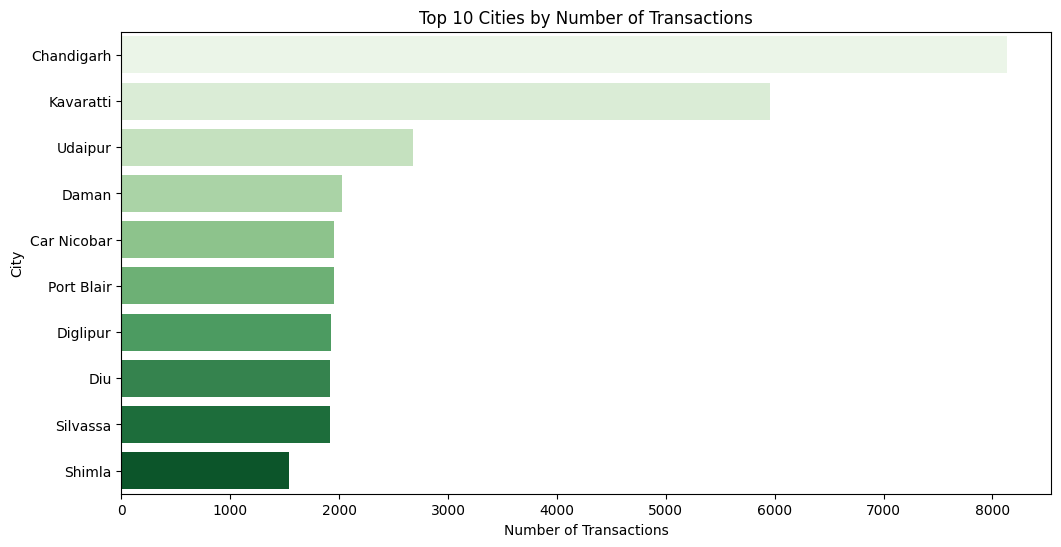

In [19]:
# Transactions by City
plt.figure(figsize=(12, 6))
sns.countplot(y=df['City'], order=df['City'].value_counts().index[:10], palette='Greens')
plt.title("Top 10 Cities by Number of Transactions")
plt.ylabel("City")
plt.xlabel("Number of Transactions")
plt.show()


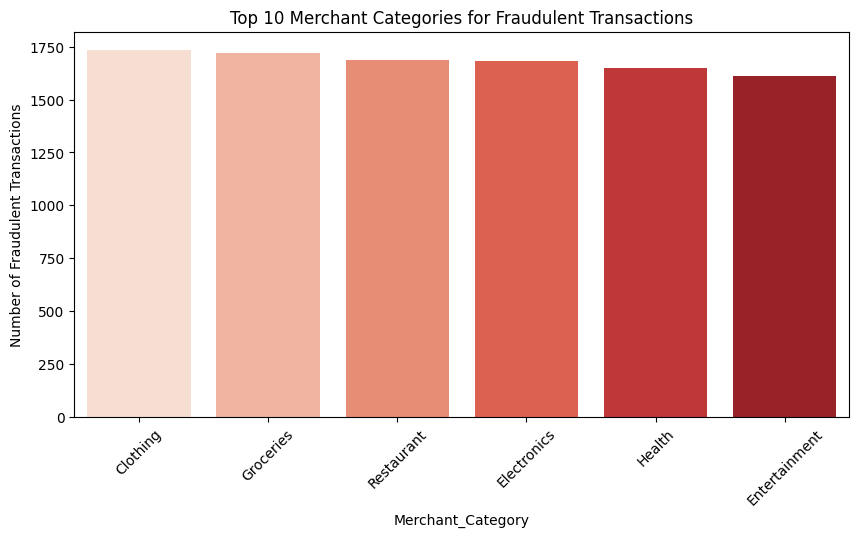

In [20]:
# Fraud by merchant category
fraud_merchant = df[df['Is_Fraud'] == 1]['Merchant_Category'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_merchant.index, y=fraud_merchant.values, palette='Reds')
plt.title("Top 10 Merchant Categories for Fraudulent Transactions")
plt.xticks(rotation=45)
plt.ylabel("Number of Fraudulent Transactions")
plt.show()

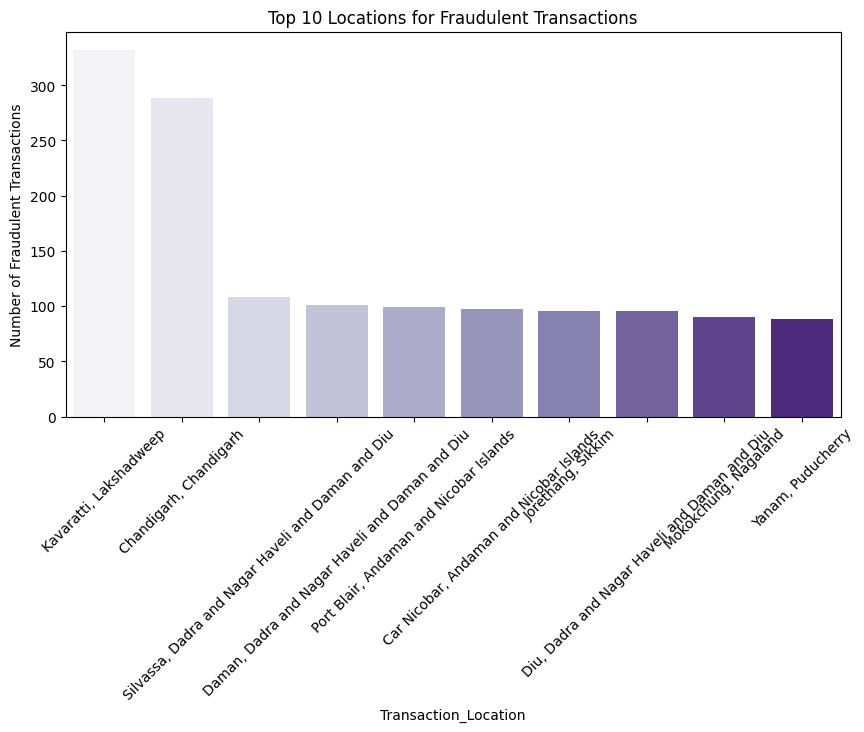

In [21]:
# Fraud by transaction location
fraud_location = df[df['Is_Fraud'] == 1]['Transaction_Location'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_location.index, y=fraud_location.values, palette='Purples')
plt.title("Top 10 Locations for Fraudulent Transactions")
plt.xticks(rotation=45)
plt.ylabel("Number of Fraudulent Transactions")
plt.show()

In [22]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['Gender', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_Device', 'Device_Type', 'Merchant_Category', 'Transaction_Location']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [23]:
# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Account_Balance']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [24]:
# --- Feature Selection ---
features = ['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_Device', 'Device_Type', 'Merchant_Category', 'Transaction_Location', 'Account_Balance']
target = 'Is_Fraud'

X = df[features]
y = df[target]


In [25]:
# Split data into training and testing sets BEFORE applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Feature scaling (Only fit on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE (Only on training set)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [27]:
# --- Model Training ---
rf_model = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [28]:
# Predictions
y_pred = rf_model.predict(X_test)

In [29]:
# --- Model Evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.949525
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     37982
           1       0.00      0.00      0.00      2018

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

Confusion Matrix:
 [[37981     1]
 [ 2018     0]]


In [30]:
clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 94.95%
